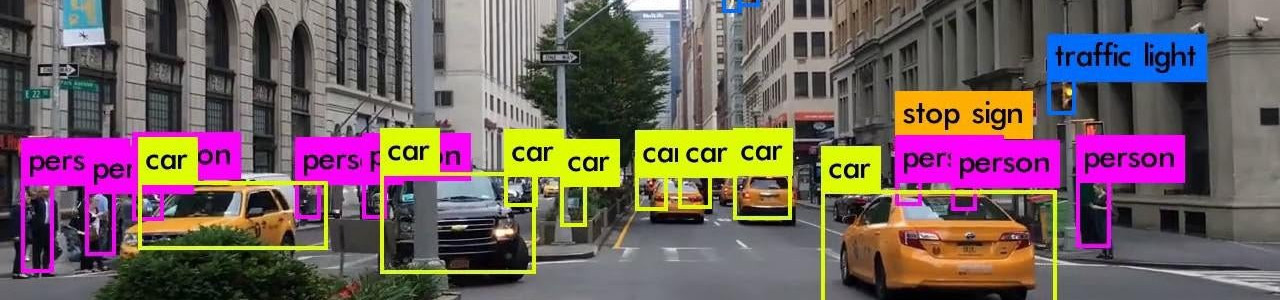

# Convolutional Neural Network

## I) - Introduction

Today, artificial intelligence allows us to do fabulous things...

If I ask you to write **an algorithm that can detect a cat on a picture**, could you develop it?\
Maybe you would have a result that works from time to time, and even that would be an achievement.

The color of the fur, the color of the eyes, the position of the cat, the size of the cat, the perspective ... so many parameters to take into account.

But let's go further, let's say I ask you to write an algorithm that can tell the difference between more than 1000 different species in an image.\
You would give up, wouldn't you?

Let me introduce you to **convolutional neural networks**, the heart of **Computer Vision**, used to manipulate visual data.

### What is Computer Vision

Computer Vision, as its name indicates, is intended to give **sight** to machines, more concretely it is a field of artificial intelligence that consists in **interpreting visual data.**

Today Computer Vision is a well-defined branch of AI, whether it is **classification**, **object detection** or even **image segmentation**, all of this falls under what is called **CV** (Computer Vision).

> Today, CV is present in Tesla cars for example, but also in some cameras, in storage shed robots like Amazon's but also in our phones with facial recognition ...

### What is a Convolutional Neural Network

A convolutional neural network is a **deep learning algorithm** that takes visual data as input.\
Its architecture is inspired by the organization of neurons and the visual cortex in the human brain.

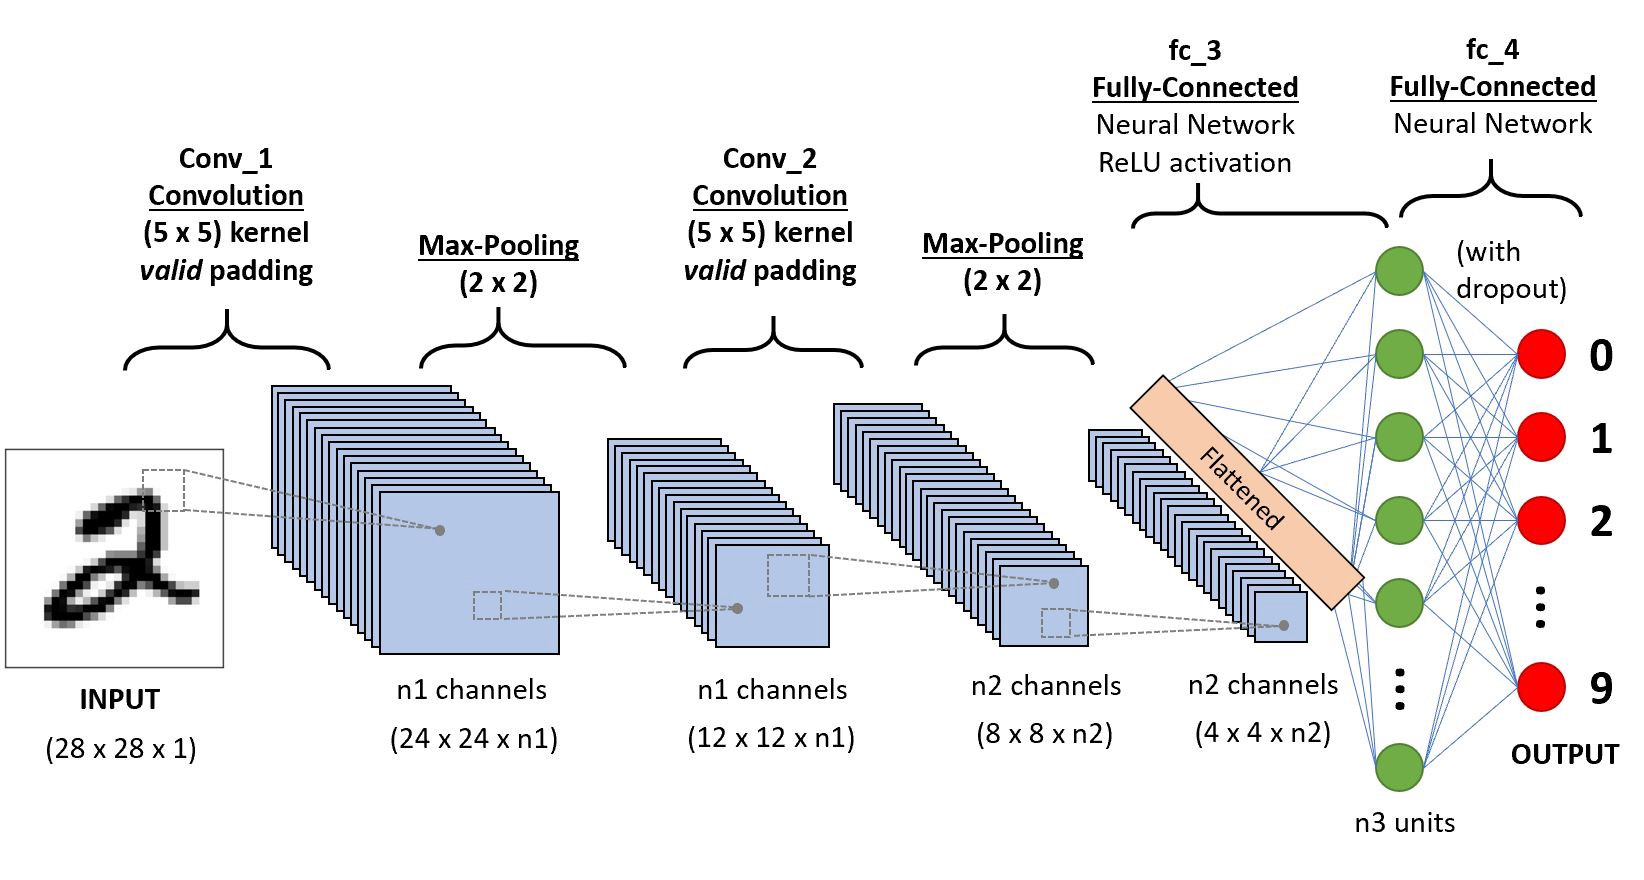

In reality, an image is a matrix, thus a 2D array, which can be reshaped into a 1D array and given as input to a classical neural network.

And honestly on some data it can work, but the **convolutions through their filters can perceive the particularities of an image**. Their great strength is to be able to **bring out patterns**, to classify them.

> I advise you to look at this [article](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) before you start on the subject.

### Torchvision - Introduction & Installation

The Torchvision library is a part of the PyTorch project.\
This part contains popular datasets, neural network architectures and visual data processing functions specific to Computer Vision

To **install it**, run the cell below:
> If you prefer to install it with your virtual env manager, Conda style, feel free to run the command in your command interpreter.

In [ ]:
!pip3 install torch
!pip3 install torchvision

Like all libraries, remember to import it before you can use it in code.\
Run the cell below.

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

from torchvision import transforms

## II) - Get the data

Before actually learning about convolution, let's start by creating a fully connected neural network to identify numbers.\
This will be useful to compare the efficiency of both AI.

Torchvision provides **several built-in datasets** in the ``torchvison.datasets`` module.\
You can find the list of datasets [here](https://pytorch.org/vision/stable/datasets.html)

Today we will work on the **[MNIST](https://en.wikipedia.org/wiki/MNIST_database)** dataset.\
This dataset is iconic and certainly the most known, and the simplest of the domain.

You will observe that even with a fully-connected one we get nice results.\
In this dataset you'll find **digits in the form of an image** that you have to **classify from 0 to 9**.

Start by downloading this dataset, don't forget to split it into separate **train and test sets**.

> You can specify in the function [torchvision.datasets.MNIST(...,train=false/true,...)](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST)

In [ ]:
train_set = None

test_set = None

### Visualize the data

You now have two variables.\
The training dataset ``train_set`` and the test dataset ``test_set``.

A step that is sometimes neglected is to **think about visualizing your data**.\
For example when working on a visual dataset, it can be interesting to look at what a sample image of this dataset can look like.

Indeed, from an optimization point of view, knowing your data can allow you to adapt your architecture in order to maximize the efficiency of your model on these data.

To visualize this data, simply execute the cell below.

In [ ]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(train_set[i][0].reshape(28, 28, 1), cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])
print(fig)

We can also look at different attributes like the number of images in the dataset, the size of each image or the label of an image.

In [ ]:
image, label = train_set[0]
print("total images :", len(train_set)) # pixels value
print("shape :", image.shape) # pixels value
print("label :", label) # Number represented in the image

As you can see, we have images **28 pixels high and 28 pixels wide**, with **one channel** (black & white image).

These images represent a number from 0 to 9, we have **10 different labels** (or 10 different possible output).\
The first picture represents a 5, therefore its label is 5.

### Using Batch

**60,000** is a lot of images to process one by one, to make it easier for our model to process this data while training we are going to use ``batch``.

``Batch`` is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. In other words, before calculating the error and apply backpropagation after each image, if our batch size is 64 we will go through 64 images before doing it. **This improves the learning of our AI** by **applying the backpropagation on the error average.**

As in the previous notebook we will use a [**``dataloader``**](https://pytorch.org/docs/stable/data.html), this time we don't need to redefine a ``Dataset`` class since we are using a ``builtin`` dataset in ``torchvision``.

Remember to specify that you want a ``batch_size`` of ``64``.

In [ ]:
train_loader = None

assert len(train_loader) == 938, "Your training dataset of 60,000 images isn't split with a 64 batch_size"

batch = next(iter(train_loader)) # obtain the first batch
images, labels = batch
print("shape :", images.shape)
print("labels :", labels.shape)

We now have `938` blocks containing `64` images each (and their equivalent labels).\
This will **drastically decrease our training time** because with one backward propagation, 64 images are processed.

> Pytorch is built to be used with batch, it is thus quite simple to implement it in our code.

Here is an example of a classical neural network that works with batches of 64.

In [ ]:
class MyNetwork(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(1, 10)
        self.linear2 = torch.nn.Linear(10, 1)
        
    def forward(self, x):
        x = torch.nn.functional.relu(self.linear1(x))
        x = torch.nn.functional.relu(self.linear2(x))
        return x

model = MyNetwork()
input = torch.ones((64, 1), dtype=torch.float)

mse = torch.nn.MSELoss() # Loss function
expected = torch.ones((64, 1), dtype=torch.float)

output = model.forward(input)
loss = mse(output, expected)

print("Input  :", input.shape)
print("Output :", output.shape)
print("loss :", output.shape)

As you can see, the model accepts and return the data and prediction in batch.\
This also applies in every loss function, we can pass the batch of the predictions and the batch of expected values.\
The final loss will be the average of each loss in the batch.

### Probabilstic Prediction

A key difference is going to be the output of our model.\
In this exercise, we are using a probabilistic approach.\
This means that are model will **output a probality for each labels.**\
We have 10 labels (one for each digit), **our model should output 10 values.**\
The label with the highest value will be the label predicted by the model.

The ``mean squared error`` isn't meant to deal with this type of output.\
To calculate the loss we are gonna need the [``cross entropy loss``](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy).

In [ ]:
loss_fonct = torch.nn.CrossEntropyLoss() # Loss function

output = torch.rand((64, 10), dtype=torch.float) # theoretical output of the model
expected = torch.ones((64), dtype=torch.long) # expected labels

loss_fonct(output, expected)

> Cross entropy loss takes the output of the model and the expected label.\
You don't need to calculate the label of the prediction.

## III) - Image & simple NN

Now that you know how to work with images and batches.

**Exercise :**\
With all this information, it's your turn to build a simple model (without convolution) to identify the number in the given images:

In [ ]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Define layers, the input of the first layer should be the number of pixels of an image
        # The output size should be 10 for the 10 possible output. For example you could define 4 linear layers.
        
    def forward(self, x):
        # Use your activation functions here, for example you could use ReLU
        return x

In [ ]:
EPOCH = 2

model = MyModel()
loss_fonct = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(EPOCH): #training
    for batch in train_loader:
        optimizer.zero_grad()
        images, labels = batch
        output = model.forward(images.reshape(64, 28 * 28))
        loss = loss_fonct(output, labels)
        loss.backward()
        optimizer.step()

total, correct = 0, 0
for image, label in test_set: #testing
    output = model.forward(image.reshape(1, 28 * 28))
    if (output.argmax(dim=1).item() == label):
        correct += 1
    total += 1

print("Accuracy:", correct / total)

## IV) - CNN (Convolutional Neural Network)

Let's dive into the main subject.

A convolutional neural network (CNN) is **a type of artificial neural network that is commonly used in image recognition and processing tasks.**\
It uses mathematical operations called convolutions to analyze and process input data, such as images, and extract features from it.\
The network then uses these features to make predictions or classifications.\
CNNs are commonly used in tasks such as image classification, object detection, and face recognition.

### Convolutional filters

A convolutional filter is a mathematical operation that is commonly used in image processing.\
It is called a **"convolution" because it involves combining two sets of data to produce a third set of data.**\
In the context of image processing, a convolutional filter **is used to extract features from an image by applying a set of weights to the pixels in the image.**

Imagine that you have a small grid of numbers, which represents the pixels in an image.\
A convolutional filter is like a sliding window that moves over the grid of numbers, and applies a set of weights to the numbers in the window.\
For example, the weights might be [-1, 0, 1] for a horizontal edge detector, which would look for differences in pixel values between adjacent columns of the image.

Convolution can be described as **taken a filter (kernel) and applying it to a given image**. This might not make sense so let me illustrate it:

<div>
    <center>
    <img src="./assets/conv.gif" width="600" style="padding-left: 20px;"/>
    </center>
</div>

Here are concrete examples:

<div>
    <center>
    <img src="./assets/conv_exemple.png" width="600" style="padding-left: 20px;"/>
    </center>
</div>

**The result of the convolutional filter is a new set of numbers**, which represents the output of the filter. This output can be used to extract features from the image, such as edges or textures.


Each convolution layer has its own filter, with multiple parameters such as:
- `Kernel size:` size of the filter(kernel)
- `stride:` the amount of column / row we move to the right / bottom
- `padding:` column / row of zeros added to the edge of the image

<div>
    <center>
    <img src="./assets/params_exemple.png" width="600" style="padding-left: 20px;"/>
    </center>
</div>

The shape of the output can be computed with the following formula:

## CNN output size formula (square)
- we have an $n * n$ input
- we have an $f * f$ filter
- we have a padding $p$
- we have a filter $f$
- we have an output size $O$

## $O = \frac{n - f +2p}{s} + 1$

## CNN output size formula (non square)
- we have an $Nh * Nw$ input
- we have an $Fh * Fw$ filter
- we have a padding $p$
- we have a filter $f$
- we have an output size $O$

## $Oh = \frac{Nh - Fh +2p}{s} + 1$
## $Ow = \frac{Nw - Fw +2p}{s} + 1$

Now that you know how convolutions work, let's try to use them

**Exercise :**\
By changing the convolution parameters, try to match the expected output size

**Expected :**\
`torch.Size([1, 1, 26, 26])`

In [ ]:
image = torch.randn(1, 1, 28, 28)
filter = torch.randn(1, 1, 3, 3)

# code here (modify stride & padding value to match expected output size)

out_feat_F = F.conv2d(image, filter, stride=None, padding=None)

assert out_feat_F.shape == torch.Size([1, 1, 26, 26]), "The convolution does not match the expected output size"

**Expected :**\
`torch.Size([1, 1, 28, 28])`

In [ ]:
image = torch.randn(1, 1, 28, 28)
filter = torch.randn(1, 1, 3, 3)

# code here (modify stride & padding value to match expected output size)

out_feat_F = F.conv2d(image, filter, stride=None, padding=None)

assert out_feat_F.shape == torch.Size([1, 1, 28, 28]), "The convolution does not match the expected output size"

**Expected :**\
`torch.Size([1, 1, 15, 14])`

In [ ]:
image = torch.randn(1, 1, 28, 28)
filter = torch.randn(1, 1, 2, 4)

# code here (modify stride & padding value to match expected output size)

out_feat_F = F.conv2d(image, filter, stride=None, padding=None)

assert out_feat_F.shape == torch.Size([1, 1, 15, 14]), "The convolution does not match the expected output size"

From here you should be fine with the effect that a convolution layer can have.\
Let's look at what is often used with this, the pooling layers

### Pooling layers

The main purpose of a pooling layer is to reduce the spatial dimensions of the input without losing important information.

This has two main benefits: **it reduces the number of parameters in the model**, which makes the **model faster to train and less prone to overfitting**, and it also **makes the model more robust to small translations** and deformations of the input.

A pooling layer is typically added to a CNN after one or more convolutional layers, which are responsible for extracting high-level features from the input image.\
By combining the outputs of multiple convolutional layers and applying a pooling operation, a CNN can learn to recognize complex patterns in images and use them to make predictions.

> Multiple convolution layer can be added one after the other but it can be useful to add a `Pooling` after some convolution layers.

A limiting factor of convolutional layers is that they record the precise position of features (objects you're trying to detect) in the input.\
This means that small movements in the position of the feature in the input image will result in a different prediction.\
This can happen with re-cropping, rotation, shifting, and other minor changes to the input image.

A common approach to addressing this problem from signal processing is called down sampling.\
This is where a lower resolution version of an input signal is created that still contains the large or important structural elements, without the fine detail that may not be as useful to the task.\
This can be achieved by using `Pooling Layer`

The most common pooling layer are `Max Pooling` and `Average Pooling`.

They work similarly to simple convolution layers but instead of being multiplied by a kernel.

**Here is an example of pooling layer with a (2x2) filter, and a stride of 2.**

<div>
    <center>
    <img src="./assets/pooling.png" width="400" style="padding-left: 20px;"/>
    </center>
</div>

`Max pooling` will **take the pixel with the highest value in the kernel.**\
`Average pooling` will **take the average of each pixel in the kernel.**

Let's try a little exercise to make sure you understand how a pooling layer works.

**Exercise:**\
Get the value of a ``max pooling`` and an ``average pooling`` with size of ``(2x2)`` on this kernel

In [ ]:
kernel = [[2, 3], [5, 6]]

# code here (~2 lines)

max_pooling = None
average_pooling = None

assert int(max_pooling) == 6 and int(average_pooling) == 4, "You failed the test, try another approach !"

### Torch & CNN

Convolution and Pooling layer are implemented to highlight features in an image.\
These highlighted features must then go through fully connected layers to actually have an output in the end.\
After your convolution and pooling layer, you must flatten your data, to pass it into fully connected layer(s) to output 10 labels.

<div>
    <center>
    <img src="./assets/full_model.png" width="800" style="padding-left: 20px;"/>
    </center>
</div>

**Exercise :**\
With all of this knowledge, it's your turn to create a ``CNN model``.\
Here is the list of useful functions for the creation of your CNN:
- A 2D Convolution layer: [torch.nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
- A 2D Max Pooling layer: [torch.nn.MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)
- A Linear layer: [torch.nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- ReLu Activation function: [torch.nn.functional.relu](https://pytorch.org/docs/stable/generated/torch.nn.functional.relu.html#torch.nn.functional.relu)

> Images are black & white, so there is 1 channel, keep that in mind to build your conv2d layer

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = None # Add a conv2d with a kernel size equal to 5
        self.maxpool1 = None # Add a MaxPool2d with kernel size and stride equal to 2
        self.conv2 = None # Add a conv2d with a kernel size equal to 5
        self.maxpool2 = None # Add a MaxPool2d with kernel size and stride equal to 2
        self.linear1 = None # Add a Linear layer with input of 16 and output of 128
        self.linear2 = None # Add a Linear layer with input of 128 and output of  64
        self.linear3 = None # Add a last Linear layer with input of 64 and output of 10
        
    def forward(self, x):
        x = None # Compute your self.conv1
        x = None # Apply ReLu function
        x = None # Apply your self.maxpool1

        x = None # Compute your self.conv2
        x = None # Apply ReLu function
        x = None # Apply your self.maxpool2

        # You applied conv & pooling previously, now we will pass that to our fully connected layers
        # For that the line below allow us to flatten the data.
        x = x.reshape(-1, 4 * 4)

        x = None # Compute your self.linear1
        x = None # Apply ReLu function
        x = None # Compute your self.linear2
        x = None # Apply ReLu function
        x = None # Apply your self.linear3
        return x

In [ ]:
EPOCH = 5

model = MyModel()
loss_fonct = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(EPOCH): #training
    for batch in train_loader:
        pass # (code here ~6-7 lines)
        # get images & labels from batch
        # compute the forward propagation and store the output
        # use your loss function and store it
        # reset your gradient
        # compute your gradient
        # apply your gradient
    # print your latest loss for each epoch

total, correct = 0, 0
for image, label in test_set: #testing
    output = model.forward(image.reshape(1, 1, 28, 28))
    if (output.argmax(dim=1).item() == label):
        correct += 1
    total += 1
    
accuracy = correct / total * 100
print(f'Your accuracy is {accuracy}% !')
assert accuracy > 80, "Your accuracy is not good enough, keep trying to build"

# Congratz

Congratulations for having reached the end of this lesson !\
You have been able to create your own convolutional neural network using Pytorch.